In [16]:
# Importing the neccessary libraries

# TensorFlow for dataset
import tensorflow as tf
# For plotting the images
import matplotlib.pyplot as plt

# Import sequential model, in which we will sequentially place our layers
from keras.models import Sequential
# Import neccessary layers:
# 1. Conv2D: we will use MNIST dataset, grayscaled so it will have 2 dimensions 
#   (width, height), for colored images, we can use Conv3D
#   Activation function of ReLu will be used to convert the convolved output into a ReLu function,
#   s.t. x will be x and -x will be 0
# 3. MaxPool2D: Will be used to find sum of maxpool layer, it will reduce size
#   based upon the pool_size (Stride value).
# 4. Dropout: To save the model from overfitting
# 5. Flatten: To convert 2D image to 1D before enterring it in ANN (Dense)
# 6. Dense: ANN
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

# Load the Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


6
[  0   0   0   0   0   0   0   0  37 234 253 238  43   0   0   0 100 253
 253  55   0   0   0   0   0   0   0   0]


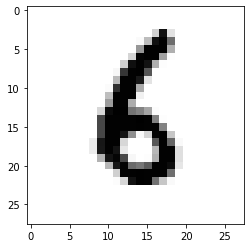

In [17]:
# Data Processing: Data Observation

# 1. Looking at one digit
image_index = 1020 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 6
print(x_train[image_index][18]) # The label is 6
plt.imshow(x_train[image_index], cmap='Greys')

# Key take away, the x_train contains RGB values like 234, 253 etc, so we will 
# be required to normalize it by dividing it by 255 to get all values between
# 0 and 1

In [18]:
# Data Processing: Reshaping

# 2. Reshaping the Data
print ("Original train data shape: ", x_train.shape, "Number of Dimension: ", len(x_train.shape))
print ("Original test data shape: ", x_test.shape, "Number of Dimension: ", len(x_test.shape))

# To use data in Keras API, we need 4 dimensions, so reshaping the data.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print ("Reshaped train data shape: ", x_train.shape, "Number of Dimension: ", len(x_train.shape))
print ("Reshaped test data shape: ", x_test.shape, "Number of Dimension: ", len(x_test.shape))

input_shape = (28, 28, 1)

Original train data shape:  (60000, 28, 28) Number of Dimension:  3
Original test data shape:  (10000, 28, 28) Number of Dimension:  3
Reshaped train data shape:  (60000, 28, 28, 1) Number of Dimension:  4
Reshaped test data shape:  (10000, 28, 28, 1) Number of Dimension:  4


In [21]:
# Data Processing: Data Standardization and Normalization 

# 3. Data Standardization
# Making sure that the values are float so that we can get decimal points after 
# division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 4. Data Normalization
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

# Verify the normalized data 
# print(x_train[image_index][18])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.14509805]
 [0.91764706]
 [0.99215686]
 [0.93333334]
 [0.16862746]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.39215687]
 [0.99215686]
 [0.99215686]
 [0.21568628]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [23]:
# Just for Information:
print('x_train shape:', x_train.shape)
# Shape of x is 28*28

x_train shape: (60000, 28, 28, 1)


In [26]:
# Builiding the Convolution Neural Network

# Defining Sequential model
model = Sequential()

# Adding the first layer: Convolution Layer

# Adding Conv2D, parameters:
# Useful Link : https://www.geeksforgeeks.org/keras-conv2d-class/
# Useful Link : https://keras.io/layers/convolutional/

# 1. filters: Number of Filters (Like in custom CNN we used 2 filters (horizontal and vertical))
#        Its always better to use filters in power of 2. Here we are using 32.
# 2. kernel_size: This parameter determines the dimensions of the kernel. Common 
#        dimensions include 1×1, 3×3, 5×5, and 7×7 which can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.
#        This parameter must be an odd integer. We are using (3,3)
# 3. Strides (Not used here): Default value is (1,1)
#        This parameter is an integer or tuple/list of 2 integers, specifying the “step” of the convolution along 
#        with the height and width of the input volume. Its default value is always set to (1, 1) which means that 
#        the given Conv2D filter is applied to the current location of the input volume and the given filter takes a 
#        1 pixel step to the right and again the filter is applied to the input volume and it is performed until we reach 
#        the far right border of the volume in which we are moving our filter. and then we move 1 pixel down.
# 4. input_shape: to specify the input shape.
 
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))

# Adding the second layer: ReLu layer
# Useful Link: https://keras.io/layers/pooling/

# pool_size = (2,2), so the size would be reduced to almost half along both the 
#              height and width.
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening the output to input it to a NN (Dense Network)
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

# Adding the third layer: NN (Dense Network)
# 169 Calculated based upon the above parameters.
# 28*28 input, so after 3*3 filter applied, post the convolving, the output will 
# be 26*26. Using maxpooling with 2*2 size, the image will be ~13*13.
# So 169 Input neuron.
model.add(Dense(169, activation=tf.nn.relu))

# Dropping out 20% of the neurons to prevent overfitting
model.add(Dropout(0.2))

# Adding a hidden layer of 16, after the dense NN
model.add(Dense(16,activation=tf.nn.softmax))


# Optimizer: Adam Optimizer
# https://towardsdatascience.com/the-3-best-optimization-methods-in-neural-networks-40879c887873
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 56s 938us/step - loss: 0.1708 - acc: 0.9488
Epoch 2/10
60000/60000 [==============================] - 56s 935us/step - loss: 0.0621 - acc: 0.9813
Epoch 3/10
60000/60000 [==============================] - 55s 922us/step - loss: 0.0419 - acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 55s 923us/step - loss: 0.0306 - acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 55s 918us/step - loss: 0.0239 - acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 55s 915us/step - loss: 0.0186 - acc: 0.9938
Epoch 7/10
60000/60000 [==============================] - 55s 924us/step - loss: 0.0141 - acc: 0.9951
Epoch 8/10
60000/60000 [==============================] - 55s 923

In [27]:
# Evaluating Model Performance:

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 225us/step


[0.04783361253576877, 0.9882]

In [0]:
# Saving Model:

from keras.models import load_model

model.save('mnist_keras.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model



In [29]:

model_test = load_model('mnist_keras.h5')
model_test.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 227us/step


[0.04783361253576877, 0.9882]